In [2]:
import sys
print(sys.executable)


d:\port\TL2H\idtxl_env\Scripts\python.exe


In [ ]:
import causationentropy

## Overview of causation entropy package

link git: https://github.com/Center-For-Complex-Systems-Science/causationentropy/tree/main

date publish: 19 Jan 2026

link core algorithm: https://github.com/Center-For-Complex-Systems-Science/causationentropy/blob/main/causationentropy/core/discovery.py

Formula of TE:
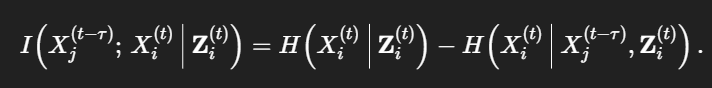

Algorithm to find parents set:

Input: Target node Xi, dataset D

Initialize Pi = empty set

For each node Xj ≠ Xi:
    Compute TE(Xj → Xi)
    If significant:
        Add Xj to candidate set Ci

For each pair (Xj, Xk) in Ci:
    If TE(Xj → Xi) ≤ min(TE(Xj → Xk), TE(Xk → Xi)):
        Remove weaker influence

Return remaining nodes as Pi


In [9]:
import pandas as pd
from causationentropy import discover_network

# 1. Load your data
df = pd.read_csv('vn30_close_prices_2019_2025.csv', index_col='time')

# 2. Pre-process (oCSE works best on stationary returns)
returns = df.pct_change().dropna()

# 3. Run the oCSE discovery
# max_lag=1 looks for the relationship: Stock_A(t-1) -> Stock_B(t)
network = discover_network(returns, method='standard', max_lag=1)

# 4. Extract parents to a dictionary
causal_parents = {node: list(network.predecessors(node)) for node in returns.columns}
print(causal_parents)

Estimating edges for node 0 (ACB)
Estimating edges for node 1 (BCM)
Estimating edges for node 2 (BID)
Estimating edges for node 3 (BVH)
Estimating edges for node 4 (CTG)
Estimating edges for node 5 (FPT)
Estimating edges for node 6 (GAS)
Estimating edges for node 7 (GVR)
Estimating edges for node 8 (HDB)
Estimating edges for node 9 (HPG)
Estimating edges for node 10 (MBB)
Estimating edges for node 11 (MSN)
Estimating edges for node 12 (MWG)
Estimating edges for node 13 (PLX)
Estimating edges for node 14 (POW)
Estimating edges for node 15 (SAB)
Estimating edges for node 16 (SHB)
Estimating edges for node 17 (SSI)
Estimating edges for node 18 (STB)
Estimating edges for node 19 (TCB)
Estimating edges for node 20 (TPB)
Estimating edges for node 21 (VCB)
Estimating edges for node 22 (VHM)
Estimating edges for node 23 (VIB)
Estimating edges for node 24 (VIC)
Estimating edges for node 25 (VJC)
Estimating edges for node 26 (VNM)
Estimating edges for node 27 (VPB)
{'ACB': [], 'BCM': ['BVH'], 'B

## Phân tích